In [31]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [32]:
# Load your dataset
data = pd.read_csv('train_dataset.csv')


In [33]:
# Print column names
print(data.columns)

# Display the first few rows of the dataset
print(data.head())


Index(['Temperature', 'Humidity', 'Hydrogen'], dtype='object')
   Temperature   Humidity  Hydrogen
0    37.901004  64.076272  1.134445
1    38.562033  62.918764  0.789692
2    32.338973  67.711260  0.373176
3    32.673930  73.594626  0.248652
4    36.726101  67.345555  0.352121


In [34]:
# Split the dataset into features (X) and labels (if applicable)
X = data[['Temperature', 'Humidity', 'Hydrogen']]

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


In [35]:
# Create and train the Isolation Forest model
clf = IsolationForest()
clf.fit(X_train)


IsolationForest()

In [36]:
# Make predictions on the testing data
predictions = clf.predict(X_test)


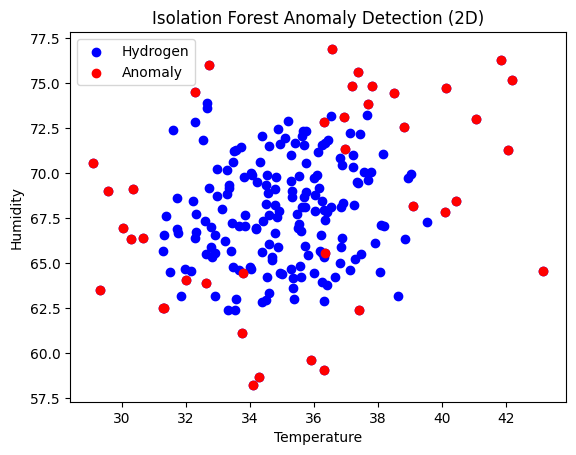

In [37]:
# Plot normal data points
plt.scatter(X_test['Temperature'], X_test['Humidity'], c='blue', label='Hydrogen')

# Plot anomalies detected by the model
anomalies = X_test[predictions == -1]  # Select data points predicted as anomalies
plt.scatter(anomalies['Temperature'], anomalies['Humidity'], c='red', label='Anomaly')

plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Isolation Forest Anomaly Detection (2D)')
plt.legend()
plt.show()


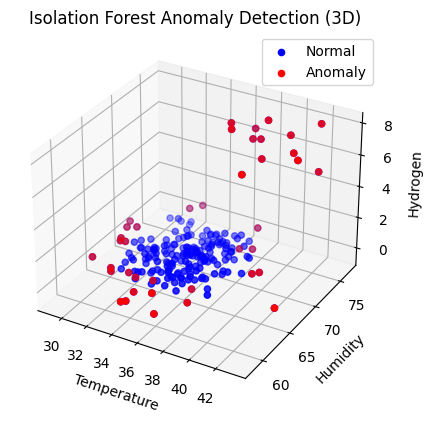

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot normal data points
ax.scatter(X_test['Temperature'], X_test['Humidity'], X_test['Hydrogen'], c='blue', label='Normal')

# Plot anomalies detected by the model
anomalies = X_test[predictions == -1]  # Select data points predicted as anomalies
ax.scatter(anomalies['Temperature'], anomalies['Humidity'], anomalies['Hydrogen'], c='red', label='Anomaly')

ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Hydrogen')
ax.set_title('Isolation Forest Anomaly Detection (3D)')
ax.legend()
plt.show()


In [39]:
from joblib import dump
# Dump the trained model to a file
dump(clf, 'anomaly-model.joblib')


['anomaly-model.joblib']

In [40]:
from joblib import load
# Load the trained model
loaded_model = load('anomaly-model.joblib')


In [41]:
# Calculate anomaly scores for the original dataset
original_scores = loaded_model.decision_function(X_train)  # Assuming X_train is the training dataset


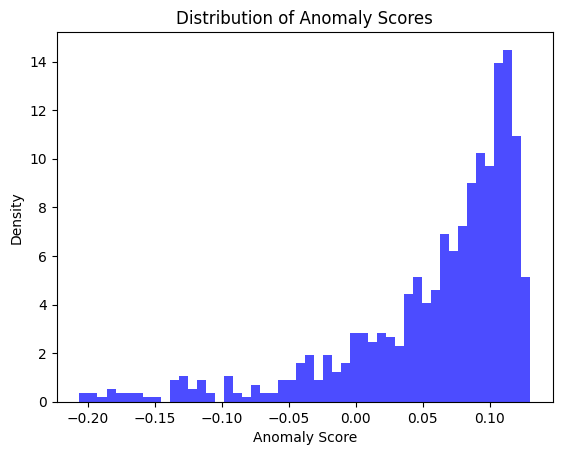

In [42]:
# Analyze the distribution of anomaly scores
plt.hist(original_scores, bins=50, density=True, alpha=0.7, color='blue')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.title('Distribution of Anomaly Scores')
plt.show()


In [43]:
# Select threshold based on percentile of the score distribution
threshold_percentile = 95  # Example: 95th percentile
threshold = np.percentile(original_scores, threshold_percentile)

print(f"Selected threshold based on {threshold_percentile}th percentile: {threshold}")


Selected threshold based on 95th percentile: 0.12224410591153899


In [44]:
from joblib import load

# Load the trained model
loaded_model = load('anomaly-model.joblib')

# Load the new dataset
new_data = pd.read_csv('test_dataset.csv')  # Replace 'new_dataset.csv' with the path to your new dataset file

# Assuming new_data has the same features as the original dataset used for training

# Make predictions on the new dataset
new_predictions = loaded_model.decision_function(new_data)

# Analyze anomaly scores
# You may need to adjust the threshold based on the distribution of anomaly scores from the original dataset
threshold = -0.122  # Example threshold
predicted_anomalies = new_data[new_predictions < threshold]

# Print the predicted anomalies
print("Predicted Anomalies:")
print(predicted_anomalies)

# Optionally, evaluate the model's performance using ground truth labels (if available)
# Compare the predicted anomalies with known anomalies to calculate precision, recall, etc.


Predicted Anomalies:
    Temperature   Humidity  Hydrogen
50    35.556899  69.977188  7.911468
51    39.606051  69.896740  6.861179
52    36.027450  82.003608  6.694716
53    42.272969  72.380947  7.617076
54    43.075849  72.047677  7.159883
55    40.169461  74.785472  7.881166
56    38.088846  71.156309  6.905053
57    40.354996  71.819502  7.238875
59    39.371198  70.454974  8.641117
